In [1]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2

In [ ]:
# import os
# img_dir = '/content/drive/MyDrive/food_competition_KT_set1/food_competition_KT_set1/train'
# categoris = os.listdir(img_dir)
# nb_categoris = len(categoris)

In [2]:
data = np.load('data.npy')
labels = np.load('labels.npy')

print(data.shape)
print(labels.shape)

(10000, 128, 128, 3)
(10000, 50)


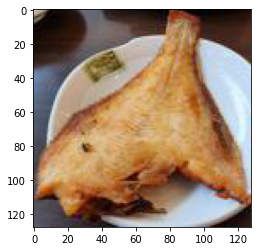

In [3]:
plt.imshow(data[0])

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,ReLU,LeakyReLU,ELU,BatchNormalization,Dropout,GlobalAveragePooling2D,Input,AveragePooling2D, Activation
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD,Nadam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

In [6]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,Add,Concatenate
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPool2D
from keras.layers import BatchNormalization, Dropout

act = tf.nn.leaky_relu

np.random.seed(0)

#65퍼 Best batch32 epoch 200 adam()


#     v=Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(input_img)
#     v=BatchNormalization()(v)
#     v=Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=MaxPool2D((2, 2))(v)
#     v=Dropout(0.2)(v)
#     v=Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=MaxPool2D((2, 2))(v)
#     v=Dropout(0.2)(v)
#     v=Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=MaxPool2D((2, 2))(v)
#     v=Dropout(0.2)(v)
#     v=Conv2D(256, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=Conv2D(256, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=MaxPool2D((2, 2))(v)
#     v=Dropout(0.2)(v)
#     v=Conv2D(512, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     v=Conv2D(512, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(v)
#     v=BatchNormalization()(v)
#     #v=Add()([inp,v])
#     v=MaxPool2D((2, 2))(v)
#     v=Dropout(0.2)(v)
#     v=Flatten()(v)
#     v=Dense(128, activation='relu', kernel_initializer='he_uniform')
#     v=BatchNormalization()(v)
#     v=Dropout(0.2)(v)
#     v=Dense(50, activation='softmax')(v)
#     model=Model(input_img, v)
#     input_img = Input(shape=(32,32,3))
def model_fn():
    with tf.device("/gpu:0"):
     
        input_img = Input(shape=(128,128,3))
        v=Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same')(input_img)
        v=BatchNormalization()(v)
        v=Conv2D(32, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=MaxPool2D((2, 2))(v)
        v=Dropout(0.2)(v)
        v=Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=MaxPool2D((2, 2))(v)
        v=Dropout(0.2)(v)
        ###############
        v1=Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v1=BatchNormalization()(v1)
        v1=Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v1)
        v1=BatchNormalization()(v1)
        v1=MaxPool2D((2, 2))(v1)
        v1=Dropout(0.2)(v1)

        #################
        v2=Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v2=BatchNormalization()(v2)
        v2=Conv2D(64, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v2)
        v2=BatchNormalization()(v2)
        v2=MaxPool2D((2, 2))(v2)
        v2=Dropout(0.2)(v2)

        v=Concatenate()([v1,v2])
        v=Conv2D(128, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=Conv2D(128, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=MaxPool2D((2, 2))(v)
        v=Dropout(0.2)(v)
        v=Conv2D(256, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=Conv2D(256, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=MaxPool2D((2, 2))(v)
        v=Dropout(0.2)(v)
        v=Conv2D(512, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=Conv2D(512, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        v=BatchNormalization()(v)
        v=MaxPool2D((2, 2))(v)
        v=Dropout(0.2)(v)
        # v=Conv2D(128, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        # v=BatchNormalization()(v)
        # v=Conv2D(128, (3, 3), activation=act,  kernel_initializer='he_uniform', padding='same')(v)
        # v=BatchNormalization()(v)
        # v=MaxPool2D((2, 2))(v)
        # v=Dropout(0.5)(v)
        v=Flatten()(v)
        v=Dense(128, activation='relu', kernel_initializer='he_uniform')(v)
        v=BatchNormalization()(v)
        v=Dropout(0.2)(v)
        v=Dense(50, activation='softmax', kernel_initializer='he_uniform')(v)
        model=Model(input_img,v)
        return model
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(256, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(256, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(512, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(512, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#     model.add(Dense(50, activation='softmax'))

In [7]:
#model.summary()

In [8]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 80:
        lr *= 0.5e-3
    elif epoch > 60:
        lr *= 1e-3
    elif epoch > 40:
        lr *= 1e-2
    elif epoch > 20:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [9]:
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]


In [10]:
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
pat = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

fold_no = 1
BATCH_SIZE = 64
EPOCHS = 100
acc_per_fold = []
loss_per_fold = []

from sklearn.model_selection import KFold
np.random.seed(0)
k=5
kf=KFold(n_splits=k,shuffle=True,random_state = 5)

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    trainGenerator = ImageDataGenerator(rescale=1/255., horizontal_flip=True, vertical_flip=True,
                        rotation_range = 15, shear_range=0.2)
    trainiterator = trainGenerator.flow(X_train, y_train, batch_size=BATCH_SIZE)

    testGenerator = ImageDataGenerator(rescale=1/255., horizontal_flip=True,vertical_flip=True,
                        rotation_range = 15, shear_range=0.2)
    testiterator = testGenerator.flow(X_test, y_test, batch_size=BATCH_SIZE)


    model = model_fn()
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit_generator(trainiterator,
                  epochs=EPOCHS,
                  validation_data= testiterator, verbose=1,callbacks=callbacks)

    # Generate generalization metrics
    scores = model.evaluate_generator(testiterator, verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Learning rate:  0.001


C:\Users\User\AppData\Local\Temp\ipykernel_11184\3501471710.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(trainiterator,


Epoch 1/100
125/125 [==============================] - 25s 174ms/step - loss: 3.0041 - accuracy: 0.2110 - val_loss: 10.8188 - val_accuracy: 0.0320 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
125/125 [==============================] - 21s 169ms/step - loss: 2.3435 - accuracy: 0.3352 - val_loss: 9.7567 - val_accuracy: 0.0735 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
125/125 [==============================] - 22s 172ms/step - loss: 2.0868 - accuracy: 0.3881 - val_loss: 5.2427 - val_accuracy: 0.1355 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
125/125 [==============================] - 21s 170ms/step - loss: 1.9371 - accuracy: 0.4308 - val_loss: 2.6168 - val_accuracy: 0.3635 - lr: 0.0010
Learning rate:  0.001
Epoch 5/100
125/125 [==============================] - 21s 169ms/step - loss: 1.7556 - accuracy: 0.4782 - val_loss: 2.0878 - val_accuracy: 0.4450 - lr: 0.0010
Learning rate:  0.001
Epoch 6/100
125/125 [==============================] - 21s 171ms/step - loss: 1.6619 - accurac

125/125 [==============================] - 22s 172ms/step - loss: 0.3674 - accuracy: 0.8855 - val_loss: 0.7983 - val_accuracy: 0.7530 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 46/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3713 - accuracy: 0.8889 - val_loss: 0.8084 - val_accuracy: 0.7580 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 47/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3680 - accuracy: 0.8849 - val_loss: 0.7965 - val_accuracy: 0.7610 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 48/100
125/125 [==============================] - 21s 169ms/step - loss: 0.3635 - accuracy: 0.8928 - val_loss: 0.8136 - val_accuracy: 0.7505 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 49/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3616 - accuracy: 0.8848 - val_loss: 0.8081 - val_accuracy: 0.7575 - lr: 3.1623e-06
Learning rate:  1e-05
Epoch 50/100
125/125 [==============================] - 22s 173ms/step - loss: 0.36

125/125 [==============================] - 21s 169ms/step - loss: 0.3309 - accuracy: 0.9000 - val_loss: 0.7908 - val_accuracy: 0.7485 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 90/100
125/125 [==============================] - 22s 173ms/step - loss: 0.3458 - accuracy: 0.8946 - val_loss: 0.7884 - val_accuracy: 0.7645 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 91/100
125/125 [==============================] - 21s 169ms/step - loss: 0.3403 - accuracy: 0.8980 - val_loss: 0.7980 - val_accuracy: 0.7520 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 92/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3438 - accuracy: 0.8944 - val_loss: 0.7945 - val_accuracy: 0.7625 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 93/100
125/125 [==============================] - 21s 171ms/step - loss: 0.3415 - accuracy: 0.8974 - val_loss: 0.7876 - val_accuracy: 0.7615 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 94/100
125/125 [==============================] - 21s 170ms/step - loss: 0.34

C:\Users\User\AppData\Local\Temp\ipykernel_11184\3501471710.py:42: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(testiterator, verbose=1)


32/32 [==============================] - 4s 130ms/step - loss: 0.7950 - accuracy: 0.7620
Score for fold 1: loss of 0.7950487732887268; accuracy of 76.2000024318695%
------------------------------------------------------------------------
Training for fold 2 ...
Learning rate:  0.001
Epoch 1/100
125/125 [==============================] - 23s 172ms/step - loss: 2.9562 - accuracy: 0.2157 - val_loss: 11.1743 - val_accuracy: 0.0265 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
125/125 [==============================] - 21s 170ms/step - loss: 2.3873 - accuracy: 0.3173 - val_loss: 7.0227 - val_accuracy: 0.0650 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
125/125 [==============================] - 21s 170ms/step - loss: 2.1228 - accuracy: 0.3886 - val_loss: 5.2326 - val_accuracy: 0.1040 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
125/125 [==============================] - 22s 174ms/step - loss: 1.9645 - accuracy: 0.4244 - val_loss: 2.9171 - val_accuracy: 0.2895 - lr: 0.0010
Learning rate

125/125 [==============================] - 22s 175ms/step - loss: 0.3802 - accuracy: 0.8831 - val_loss: 0.7812 - val_accuracy: 0.7660 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 45/100
125/125 [==============================] - 21s 171ms/step - loss: 0.3982 - accuracy: 0.8777 - val_loss: 0.7856 - val_accuracy: 0.7660 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 46/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3821 - accuracy: 0.8841 - val_loss: 0.7859 - val_accuracy: 0.7665 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 47/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3811 - accuracy: 0.8804 - val_loss: 0.7676 - val_accuracy: 0.7675 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 48/100
125/125 [==============================] - 21s 172ms/step - loss: 0.3846 - accuracy: 0.8798 - val_loss: 0.7799 - val_accuracy: 0.7720 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 49/100
125/125 [==============================] - 22s 174ms/step - loss: 0.38

125/125 [==============================] - 21s 171ms/step - loss: 0.3582 - accuracy: 0.8919 - val_loss: 0.7738 - val_accuracy: 0.7735 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 89/100
125/125 [==============================] - 22s 174ms/step - loss: 0.3608 - accuracy: 0.8870 - val_loss: 0.7744 - val_accuracy: 0.7680 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 90/100
125/125 [==============================] - 21s 170ms/step - loss: 0.3619 - accuracy: 0.8873 - val_loss: 0.7771 - val_accuracy: 0.7730 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 91/100
125/125 [==============================] - 22s 172ms/step - loss: 0.3603 - accuracy: 0.8895 - val_loss: 0.7809 - val_accuracy: 0.7630 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 92/100
125/125 [==============================] - 21s 169ms/step - loss: 0.3560 - accuracy: 0.8909 - val_loss: 0.7879 - val_accuracy: 0.7675 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 93/100
125/125 [==============================] - 21s 170ms/step - loss: 0.36

125/125 [==============================] - 21s 169ms/step - loss: 0.5527 - accuracy: 0.8229 - val_loss: 0.8524 - val_accuracy: 0.7345 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 32/100
125/125 [==============================] - 21s 170ms/step - loss: 0.5339 - accuracy: 0.8395 - val_loss: 0.8331 - val_accuracy: 0.7505 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 33/100
125/125 [==============================] - 22s 173ms/step - loss: 0.5210 - accuracy: 0.8371 - val_loss: 0.8166 - val_accuracy: 0.7495 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 34/100
125/125 [==============================] - 21s 170ms/step - loss: 0.5162 - accuracy: 0.8351 - val_loss: 0.8245 - val_accuracy: 0.7525 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 35/100
125/125 [==============================] - 21s 170ms/step - loss: 0.5144 - accuracy: 0.8382 - val_loss: 0.8165 - val_accuracy: 0.7465 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 36/100
125/125 [==============================] - 21s 168ms/step - loss:

125/125 [==============================] - 22s 178ms/step - loss: 0.3771 - accuracy: 0.8863 - val_loss: 0.7610 - val_accuracy: 0.7780 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 76/100
125/125 [==============================] - 22s 180ms/step - loss: 0.3747 - accuracy: 0.8874 - val_loss: 0.7724 - val_accuracy: 0.7715 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 77/100
125/125 [==============================] - 22s 177ms/step - loss: 0.3818 - accuracy: 0.8808 - val_loss: 0.7714 - val_accuracy: 0.7695 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 78/100
125/125 [==============================] - 22s 174ms/step - loss: 0.3784 - accuracy: 0.8857 - val_loss: 0.7868 - val_accuracy: 0.7730 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 79/100
125/125 [==============================] - 21s 171ms/step - loss: 0.3735 - accuracy: 0.8860 - val_loss: 0.7671 - val_accuracy: 0.7690 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 80/100
125/125 [==============================] - 21s 170ms/step - loss: 0.37

125/125 [==============================] - 22s 174ms/step - loss: 1.0006 - accuracy: 0.6875 - val_loss: 1.5190 - val_accuracy: 0.5745 - lr: 0.0010
Learning rate:  0.001
Epoch 19/100
125/125 [==============================] - 22s 173ms/step - loss: 0.9881 - accuracy: 0.6927 - val_loss: 1.4538 - val_accuracy: 0.5995 - lr: 0.0010
Learning rate:  0.001
Epoch 20/100
125/125 [==============================] - 22s 174ms/step - loss: 0.9262 - accuracy: 0.7115 - val_loss: 1.4501 - val_accuracy: 0.5805 - lr: 0.0010
Learning rate:  0.001
Epoch 21/100
125/125 [==============================] - 22s 175ms/step - loss: 0.9036 - accuracy: 0.7134 - val_loss: 1.2741 - val_accuracy: 0.6400 - lr: 0.0010
Learning rate:  0.0001
Epoch 22/100
125/125 [==============================] - 22s 176ms/step - loss: 0.7118 - accuracy: 0.7763 - val_loss: 0.9329 - val_accuracy: 0.7150 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 23/100
125/125 [==============================] - 22s 174ms/step - loss: 0.6467 - accuracy:

125/125 [==============================] - 22s 175ms/step - loss: 0.3475 - accuracy: 0.8954 - val_loss: 0.8092 - val_accuracy: 0.7610 - lr: 5.0000e-07
Learning rate:  1e-06
Epoch 63/100
125/125 [==============================] - 22s 172ms/step - loss: 0.3526 - accuracy: 0.8949 - val_loss: 0.8237 - val_accuracy: 0.7620 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 64/100
125/125 [==============================] - 22s 173ms/step - loss: 0.3517 - accuracy: 0.8942 - val_loss: 0.8125 - val_accuracy: 0.7680 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 65/100
125/125 [==============================] - 21s 172ms/step - loss: 0.3534 - accuracy: 0.8904 - val_loss: 0.8075 - val_accuracy: 0.7680 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 66/100
125/125 [==============================] - 21s 172ms/step - loss: 0.3485 - accuracy: 0.8947 - val_loss: 0.7976 - val_accuracy: 0.7650 - lr: 1.0000e-06
Learning rate:  1e-06
Epoch 67/100
125/125 [==============================] - 22s 175ms/step - loss: 0.35

Learning rate:  0.001
Epoch 5/100
125/125 [==============================] - 22s 173ms/step - loss: 1.8211 - accuracy: 0.4599 - val_loss: 2.2719 - val_accuracy: 0.4190 - lr: 0.0010
Learning rate:  0.001
Epoch 6/100
125/125 [==============================] - 22s 175ms/step - loss: 1.7298 - accuracy: 0.4888 - val_loss: 2.3114 - val_accuracy: 0.4305 - lr: 0.0010
Learning rate:  0.001
Epoch 7/100
125/125 [==============================] - 22s 172ms/step - loss: 1.6048 - accuracy: 0.5178 - val_loss: 2.0668 - val_accuracy: 0.4770 - lr: 0.0010
Learning rate:  0.001
Epoch 8/100
125/125 [==============================] - 22s 174ms/step - loss: 1.5364 - accuracy: 0.5387 - val_loss: 1.5998 - val_accuracy: 0.5625 - lr: 0.0010
Learning rate:  0.001
Epoch 9/100
125/125 [==============================] - 22s 172ms/step - loss: 1.4317 - accuracy: 0.5642 - val_loss: 2.0174 - val_accuracy: 0.4585 - lr: 0.0010
Learning rate:  0.001
Epoch 10/100
125/125 [==============================] - 22s 172ms/step - 

125/125 [==============================] - 21s 172ms/step - loss: 0.3894 - accuracy: 0.8794 - val_loss: 0.7992 - val_accuracy: 0.7605 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 50/100
125/125 [==============================] - 22s 173ms/step - loss: 0.3785 - accuracy: 0.8834 - val_loss: 0.8174 - val_accuracy: 0.7590 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 51/100
125/125 [==============================] - 22s 176ms/step - loss: 0.3905 - accuracy: 0.8775 - val_loss: 0.8035 - val_accuracy: 0.7615 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 52/100
125/125 [==============================] - 21s 172ms/step - loss: 0.3899 - accuracy: 0.8829 - val_loss: 0.8019 - val_accuracy: 0.7635 - lr: 3.1623e-06
Learning rate:  1e-05
Epoch 53/100
125/125 [==============================] - 22s 173ms/step - loss: 0.3793 - accuracy: 0.8823 - val_loss: 0.8079 - val_accuracy: 0.7610 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 54/100
125/125 [==============================] - 22s 172ms/step - loss: 0.37

125/125 [==============================] - 22s 172ms/step - loss: 0.3612 - accuracy: 0.8876 - val_loss: 0.7904 - val_accuracy: 0.7665 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 94/100
125/125 [==============================] - 21s 172ms/step - loss: 0.3589 - accuracy: 0.8891 - val_loss: 0.7879 - val_accuracy: 0.7685 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 95/100
125/125 [==============================] - 22s 172ms/step - loss: 0.3530 - accuracy: 0.8915 - val_loss: 0.7985 - val_accuracy: 0.7610 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 96/100
125/125 [==============================] - 22s 176ms/step - loss: 0.3608 - accuracy: 0.8890 - val_loss: 0.8032 - val_accuracy: 0.7635 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 97/100
125/125 [==============================] - 21s 172ms/step - loss: 0.3576 - accuracy: 0.8928 - val_loss: 0.7977 - val_accuracy: 0.7660 - lr: 5.0000e-07
Learning rate:  5e-07
Epoch 98/100
125/125 [==============================] - 22s 173ms/step - loss: 0.36

In [11]:
#accuracy_history

In [12]:
# 복잡한 모델 epoch 50
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.7950487732887268 - Accuracy: 76.2000024318695%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.7807708382606506 - Accuracy: 77.45000123977661%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.7752575874328613 - Accuracy: 77.24999785423279%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.8143574595451355 - Accuracy: 76.80000066757202%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.8046025037765503 - Accuracy: 75.59999823570251%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 76.66000008583069 (+- 0.6822024797328432)
> Loss: 0.7940074324607849
-----------------------------

In [13]:
model.save('dualvgg.h5')                                                                                                    

In [ ]:
# np.mean(accuracy_history)

In [ ]:
# accuracy_history

In [ ]:
#!pip install scikeras

In [ ]:
# from sklearn.model_selection import cross_val_score
# import scikeras
# from scikeras.wrappers import KerasClassifier

# Kmodel = KerasClassifier(build_fn=model, verbose=1)
# cross_val_score(Kmodel, X_test, y_test, cv=5, scoring="accuracy")